In [1]:
import numpy as np
import json
import pandas as pd
import scipy.stats as sm 
import pylab as pl
import collections
import string
import matplotlib.pyplot as pl
c=json.load(open('pui.json'))
pl.rcParams.update(c)
from IPython.display import HTML
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\PRIYA  SINGH\Anaconda\lib\site-packages\matplotlib\__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
mac1=pd.read_csv('mac1.csv')
pir1=pd.read_csv('pir1.csv')

In [3]:
#mac1 = mac1[mac1['rssi']>]

In [4]:
len(pir1)


3392

In [5]:
mac1['date']=pd.to_datetime(mac1['dtg'])
mac1['hour']=mac1['date'].dt.hour
mac1['minute']=mac1['date'].dt.minute
pir1['date']= pd.to_datetime(pir1['dtg'])
pir1['hour']= pir1['date'].dt.hour
pir1['minute'] = pir1['date'].dt.minute

In [6]:
r_pir1=[]
for i in range(len(pir1)):
    
    if str(pir1['date'][i])[0:10]=='2015-09-17': 
        r_pir1.append(i)
        
        
print min(r_pir1)
print max(r_pir1)
      

161
329


In [7]:
print len(r_pir1)
m_pir1 = pir1['hour'][min(r_pir1):max(r_pir1)]
k_pir1 = list (m_pir1)
print m_pir1

169
161     0
162     9
163     9
164     9
165     9
166    10
167    10
168    10
169    10
170    10
171    10
172    10
173    10
174    10
175    10
176    10
177    10
178    11
179    11
180    11
181    11
182    11
183    11
184    11
185    11
186    11
187    11
188    11
189    11
190    11
       ..
299    17
300    17
301    17
302    17
303    17
304    17
305    17
306    18
307    18
308    18
309    18
310    18
311    18
312    18
313    18
314    18
315    18
316    19
317    19
318    19
319    19
320    19
321    19
322    20
323    20
324    20
325    21
326    21
327    21
328    21
Name: hour, dtype: int64


In [8]:
row_pir1=[]

for i in range(0,24):
    
    row_pir1.append(k_pir1.count(i))
        

    
print row_pir1
print len(row_pir1)
print max(row_pir1)


[1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 12, 15, 22, 9, 18, 21, 21, 22, 10, 6, 3, 4, 0, 0]
24
22


In [9]:
r_mac1=[]


for i in range(len(mac1)):
    #print 'ji'
    if str(mac1['date'][i])[0:10]=='2015-09-17': 
        r_mac1.append(i)
        
        

In [10]:
m_mac1 = mac1['hour'][min(r_mac1):max(r_mac1)]
k_mac1 = list (m_mac1)
print m_mac1

3498      0
3499      0
3500      0
3501      0
3502      0
3503      0
3504      0
3505      0
3506      0
3507      0
3508      0
3509      0
3510      0
3511      0
3512      0
3513      0
3514      0
3515      0
3516      0
3517      0
3518      0
3519      0
3520      0
3521      0
3522      0
3523      0
3524      0
3525      0
3526      0
3527      0
         ..
11084    23
11085    23
11086    23
11087    23
11088    23
11089    23
11090    23
11091    23
11092    23
11093    23
11094    23
11095    23
11096    23
11097    23
11098    23
11099    23
11100    23
11101    23
11102    23
11103    23
11104    23
11105    23
11106    23
11107    23
11108    23
11109    23
11110    23
11111    23
11112    23
11113    23
Name: hour, dtype: int64


In [11]:
day_9_17_mac1 = day_9_17_mac1[(day_9_17_mac1['rssi']> -70)]

NameError: name 'day_9_17_mac1' is not defined

In [12]:

day_9_17_mac1 = mac1[min(r_mac1):max(r_mac1)]
day_9_17_mac1 = day_9_17_mac1[(day_9_17_mac1['rssi']> -70)]
length = len(day_9_17_mac1)
day_9_17_pir1 = pir1[min(r_pir1):max(r_pir1)]

mac_day = list(day_9_17_mac1['mac'])
print min(r_mac1)

3498


In [13]:
for i in range(len(day_9_17_mac1)):
    if (day_9_17_mac1['rssi'].iloc[i] > -70):
        print i 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [14]:
mac_day_set = set(mac_day)
print len(mac_day_set)
l=[1,11,1,1,1,1,1]
counter=collections.Counter(l)
print len(counter)
list(counter)

163
2


[1, 11]

In [15]:
counter=collections.Counter(mac_day)
print len(counter)

#HTML("<i>Italic text</i>")

print 'asdf' 
HTML("<i>Italic text</i>")

163
asdf


In [16]:
#print day_9_17_mac1.head() 
print day_9_17_pir1.head()

                            dtg  count                       date  hour  \
161  2015-09-17 00:01:21.277458      1 2015-09-17 00:01:21.277458     0   
162  2015-09-17 09:15:46.992660      1 2015-09-17 09:15:46.992660     9   
163  2015-09-17 09:27:54.395204      1 2015-09-17 09:27:54.395204     9   
164  2015-09-17 09:36:04.679095      1 2015-09-17 09:36:04.679095     9   
165  2015-09-17 09:57:29.927567      1 2015-09-17 09:57:29.927567     9   

     minute  
161       1  
162      15  
163      27  
164      36  
165      57  


In [17]:
day_9_17_mac1[day_9_17_mac1['hour']==12]



,dtg,mac,rssi,ssid,oui,count,date,hour,minute
6331,2015-09-17 12:00:31.451587,66:ba:c3:8c:ea:88,-63,<None>,Admin OUI,NaN,2015-09-17 12:00:31.451587,12,0
6354,2015-09-17 12:02:14.694866,8a:a1:58:37:cd:9f,-63,<None>,Admin OUI,NaN,2015-09-17 12:02:14.694866,12,2
6382,2015-09-17 12:05:02.663051,a2:aa:3d:0d:ad:cf,-69,<None>,Admin OUI,NaN,2015-09-17 12:05:02.663051,12,5
6386,2015-09-17 12:05:26.375902,28:5a:eb:10:21:0f,-67,<None>,Apple,NaN,2015-09-17 12:05:26.375902,12,5
6387,2015-09-17 12:05:26.431684,28:5a:eb:10:21:0f,-69,<None>,Apple,NaN,2015-09-17 12:05:26.431684,12,5
6388,2015-09-17 12:05:38.477087,f6:5c:e5:e7:d5:1f,-67,<None>,Admin OUI,NaN,2015-09-17 12:05:38.477087,12,5
6389,2015-09-17 12:05:48.382958,10:93:e9:0e:d8:6a,-49,<None>,Apple,NaN,2015-09-17 12:05:48.382958,12,5
6392,2015-09-17 12:06:09.250232,10:93:e9:0e:d8:6a,-49,<None>,Apple,NaN,2015-09-17 12:06:09.250232,12,6
6393,2015-09-17 12:06:09.298825,10:93:e9:0e:d8:6a,-49,nyu,Apple,NaN,2015-09-17 12:06:09.298825,12,6
6398,2015-09-17 12:06:27.639147,f6:5c:e5:e7:d5:1f,-69,<None>,Admin OUI,NaN,2015-09-17 12:06:27.639147,12,6


In [18]:
row_mac1=[]

for i in range(0,24):
    
    row_mac1.append(k_mac1.count(i))
    mac1_hour = mac1[min(r_mac1):max(r_mac1)][mac1['hour'][min(r_mac1):max(r_mac1)] == i]
    pir1_hour = pir1[min(r_pir1):max(r_pir1)][pir1['hour'][min(r_pir1):max(r_pir1)] == i]
    
    
        
    counter = collections.Counter(mac1_hour['mac'])
   
    print  'this is hour',i,'with pir count',row_pir1[i],'with total mac count',len(mac1_hour),
    print ''
    print counter
    print ''
    
    #HTML("<b>NEW HOUR</b>")
        
        

this is hour 0 with pir count 1 with total mac count 40 
Counter({'f4:09:d8:ab:86:f2': 6, '20:62:74:56:8c:80': 4, '4c:7c:5f:7f:98:68': 4, '60:51:2c:ea:d4:5e': 3, '00:80:48:69:5d:01': 3, 'd0:92:9e:e3:bc:18': 2, '68:a3:c4:e4:86:f9': 2, '00:ee:bd:ad:46:26': 2, 'a0:39:f7:11:f0:e1': 2, '7a:c0:65:a3:61:2c': 1, 'a8:a6:68:e6:1d:f7': 1, 'c4:9a:02:15:40:d7': 1, 'de:16:bd:23:b0:ad': 1, '3c:cb:7c:00:aa:f1': 1, '28:5a:eb:04:d5:45': 1, 'a4:c3:61:96:74:c7': 1, '84:38:38:6d:52:16': 1, 'f4:09:d8:b4:c0:b5': 1, 'f0:25:b7:4b:ad:0a': 1, '10:a5:d0:45:71:f5': 1, 'e8:50:8b:54:78:0d': 1})

this is hour 1 with pir count 0 with total mac count 12 
Counter({'e8:b1:fc:42:3a:ab': 3, '00:66:4b:91:d5:b9': 2, '14:32:d1:b2:e2:6f': 1, 'f8:16:54:89:7a:a6': 1, '68:a3:c4:e4:86:f9': 1, '48:50:73:ba:e1:7c': 1, '00:06:66:20:9e:2e': 1, 'c0:bd:d1:30:b9:61': 1, '78:4b:87:b6:22:1e': 1})

this is hour 2 with pir count 0 with total mac count 25 
Counter({'0c:12:62:87:e1:bd': 6, '00:66:4b:91:d5:b9': 4, 'e8:50:8b:e8:8a:4d': 4, '00:03

In [19]:
counter_list

NameError: name 'counter_list' is not defined

In [20]:
row_mac1 = []
remove_mac = []
for k in range(0,24):
    
    row_mac1.append(k_mac1.count(i))
    mac1_hour = mac1[min(r_mac1):max(r_mac1)][mac1['hour'][min(r_mac1):max(r_mac1)] == k]
    pir1_hour = pir1[min(r_pir1):max(r_pir1)][pir1['hour'][min(r_pir1):max(r_pir1)] == k]
    #print mac1_hour['minute'].head()
    for i in range(12):
        mac1_5minute = []
        pir1_5minute = []
        mac1_5minute = mac1_hour[(mac1['minute'] >= i*5) & (mac1['minute'] <= (i+1)*5)]
        pir1_5minute = pir1_hour[(pir1['minute'] >= i*5) & (mac1['minute'] <= (i+1)*5)]
        counter = collections.Counter(mac1_5minute['mac'])
        #print mac1_5minute 
        #counter1 = collections.Counter(pir1_5minute['count'])
        print 'hour',k ,'this is ',i*5 , 'minute with pir as', len(pir1_5minute),'and mac count in this 5min is',len(counter)
        print ''
        print counter
        
        counter_list = list(counter)
        print counter_list
        print ''
        if k <=5:
            #counter_list = list(counter)
            remove_mac = remove_mac + counter_list
            
    counter = collections.Counter(mac1_hour['mac'])
   
    #print  'this is hour',i,'with pir count',row_pir[i],'with total mac count',len(df_hour),
    #print ''
    #print counter
    #print ''
    
    #HTML("<b>NEW HOUR</b>")
        
        

    


hour 0 this is  0 minute with pir as 0 and mac count in this 5min is 4

Counter({'20:62:74:56:8c:80': 4, '4c:7c:5f:7f:98:68': 4, '28:5a:eb:04:d5:45': 1, '84:38:38:6d:52:16': 1})
['20:62:74:56:8c:80', '28:5a:eb:04:d5:45', '84:38:38:6d:52:16', '4c:7c:5f:7f:98:68']

hour 0 this is  5 minute with pir as 0 and mac count in this 5min is 3

Counter({'60:51:2c:ea:d4:5e': 3, '28:5a:eb:04:d5:45': 1, 'de:16:bd:23:b0:ad': 1})
['60:51:2c:ea:d4:5e', '28:5a:eb:04:d5:45', 'de:16:bd:23:b0:ad']

hour 0 this is  10 minute with pir as 0 and mac count in this 5min is 3

Counter({'f4:09:d8:ab:86:f2': 1, '7a:c0:65:a3:61:2c': 1, 'de:16:bd:23:b0:ad': 1})
['f4:09:d8:ab:86:f2', '7a:c0:65:a3:61:2c', 'de:16:bd:23:b0:ad']

hour 0 this is  15 minute with pir as 0 and mac count in this 5min is 4

Counter({'f4:09:d8:ab:86:f2': 5, '68:a3:c4:e4:86:f9': 2, 'd0:92:9e:e3:bc:18': 2, '7a:c0:65:a3:61:2c': 1})
['68:a3:c4:e4:86:f9', 'd0:92:9e:e3:bc:18', '7a:c0:65:a3:61:2c', 'f4:09:d8:ab:86:f2']

hour 0 this is  20 minute with p

C:\Users\PRIYA  SINGH\Anaconda\lib\site-packages\pandas\core\frame.py:1825: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


In [21]:
len(pir1)

3392

NameError: name 'row' is not defined

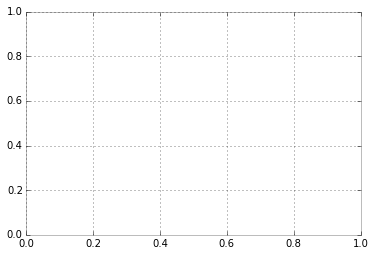

In [22]:
fig, ax = plt.subplots(1, 1)
bar=plt.hist(k,l,color='g',alpha=0.7,label='Counts with Highest Value as =%i'%max(row))
ax.set_xlabel('In 24 hours')
ax.set_ylabel('Count')
xticks(range(0,24)) 
yticks(range(0,max(row),100))

ax.set_ylim(0,1000)

ax.legend()
pl.show()

In [23]:
len(day_9_17_mac1)

858

In [24]:
l=[1,2,1,21]
r=[1,2,1]
l+r

[1, 2, 1, 21, 1, 2, 1]

In [25]:
remove_mac_set = set(remove_mac)

In [26]:
for i in (remove_mac_set):
    
    day_9_17_mac1 = day_9_17_mac1[day_9_17_mac1.mac != i]

In [27]:
 day_9_17_mac1.head()

,dtg,mac,rssi,ssid,oui,count,date,hour,minute
3823,2015-09-17 06:53:27.728491,e2:76:5c:82:77:91,-65,<None>,Admin OUI,NaN,2015-09-17 06:53:27.728491,6,53
3895,2015-09-17 07:11:09.430862,42:9d:73:db:c1:d1,-69,<None>,Admin OUI,NaN,2015-09-17 07:11:09.430862,7,11
3896,2015-09-17 07:11:09.761108,42:9d:73:db:c1:d1,-67,<None>,Admin OUI,NaN,2015-09-17 07:11:09.761108,7,11
3901,2015-09-17 07:11:54.481708,42:9d:73:db:c1:d1,-69,<None>,Admin OUI,NaN,2015-09-17 07:11:54.481708,7,11
3932,2015-09-17 07:19:20.037453,be:7b:5b:0d:20:ba,-67,<None>,Admin OUI,NaN,2015-09-17 07:19:20.037453,7,19


In [28]:
print len(day_9_17_mac1)
day_9_17_mac1['index'] = range(len(day_9_17_mac1))
print 

857



In [29]:
len(remove_mac_set)

74

In [30]:
print len(mac1)
day_9_17_mac1[day_9_17_mac1['mac']=='4c:7c:5f:7f:98:68']

18078


,dtg,mac,rssi,ssid,oui,count,date,hour,minute,index


In [31]:
mac_set = set(day_9_17_mac1['mac'])
mac_set = list(mac_set)
print len(mac_set)
print type(mac_set)
count_mac = [0]*len(mac_set)

162
<type 'list'>


In [32]:
#day_9_17_mac1[:30]

In [30]:
l_hour = dataframe_permac['hour']
print l_hour
l_hour = list(l_hour)
l_hour[1]

NameError: name 'dataframe_permac' is not defined

In [31]:
mac_set[6]

'36:f9:73:93:de:7a'

In [32]:
mac_set1 = []
mac_set1.append(mac_set[6])
print type(mac_set1)
dataframe_permac = day_9_17_mac1['mac'][day_9_17_mac1['mac'] == j]

<type 'list'>


NameError: name 'j' is not defined

In [33]:
#for i in mac_set: 
df = day_9_17_mac1[['mac','index']][day_9_17_mac1['mac'] == '7c:7a:91:ef:dd:f5' ]

    #df['index'] = range(3)
print len(df)
mac_set1 = []
mac_set1.append(mac_set[112])

0


In [34]:
for j in range(0,len(mac_set)-2500):
    #print mac_set[j]
    dataframe_permac = day_9_17_mac1[['mac','index']][day_9_17_mac1['mac'] == mac_set[j]]
print int(dataframe_permac['index'])

NameError: name 'dataframe_permac' is not defined

In [34]:
for j in range(len(mac_set)):
    #print j 
    dataframe_permac = day_9_17_mac1[['mac','index']][day_9_17_mac1['mac'] == mac_set[j]]
    #print dataframe_permac['index']
    
    #dataframe_permac['index1'] = dataframe_permac[range(len(dataframe_permac)-1)]
    #print dataframe_permac
    #(dataframe_permac['index'][1])
    l_hour = day_9_17_mac1['hour'][day_9_17_mac1['mac'] == mac_set[j]]
    l_minute = day_9_17_mac1['minute'][day_9_17_mac1['mac'] == mac_set[j]]
    l_hour = list (l_hour)
    l_minute = list (l_minute)
    #print 'h',len(l_hour),l_hour
    #print 'm',len(l_minute),l_minute
    #print type(int(l_minute[1] - l_minute[0]))
    occ = len(dataframe_permac)
    #print occ,'occ'
    occ1 = occ - 1
    #print occ1,'occ1'
    if occ!= 1 :
        #print 'occ loop'
        for i in range(occ):
            #print 'for loop'
            if (i != occ1):
                #print 'for occ1'
                if (l_hour[i] == l_hour[i+1]):
                    #print 'T in hour'
                    #print dataframe_permac['mac']
                    if (l_minute[i] == l_minute[i+1]):
                        #print 't in 1min'
                        day_9_17_mac1 = day_9_17_mac1[day_9_17_mac1['index'] != (dataframe_permac['index'].iloc[i+1]) ]
                    elif (int(l_minute[i+1] - l_minute[i]) < 7) :
                        #print i 
                        day_9_17_mac1 = day_9_17_mac1[day_9_17_mac1['index'] != (dataframe_permac['index'].iloc[i+1]) ]




                

In [35]:
day_9_17_mac1[day_9_17_mac1['mac'] == mac_set[112] ]
#day_9_17_mac1 = day_9_17_mac1[day_9_17_mac1['index'] != 3312 ]
#day_9_17_mac1[indexer]

,dtg,mac,rssi,ssid,oui,count,date,hour,minute,index
5938,2015-09-17 11:16:50.983313,0a:14:a0:bc:e9:f6,-67,<None>,Admin OUI,NaN,2015-09-17 11:16:50.983313,11,16,134


In [36]:
#for i in range(2555):
h = 0
while h!= 2555:
    print day_9_17_mac1[day_9_17_mac1['mac'] == mac_set[h]]
    print ''
    h = h+1

                             dtg                mac  rssi        ssid  \
6291  2015-09-17 11:56:32.088147  ac:bc:32:92:72:2b   -69  Sun_Palace   

          oui  count                       date  hour  minute  index  
6291  Unknown    NaN 2015-09-17 11:56:32.088147    11      56    191  

                             dtg                mac  rssi     ssid  \
9115  2015-09-17 16:22:11.812794  00:24:1d:bb:07:50   -69  PARAVLM   

                                oui  count                       date  hour  \
9115  GIGA-BYTE TECHNOLOGY CO.,LTD.    NaN 2015-09-17 16:22:11.812794    16   

      minute  index  
9115      22    737  

                              dtg                mac  rssi    ssid        oui  \
10356  2015-09-17 19:38:48.798079  8e:06:43:00:51:99   -53  <None>  Admin OUI   

       count                       date  hour  minute  index  
10356    NaN 2015-09-17 19:38:48.798079    19      38    840  

                              dtg                mac  rssi    ssid        o

IndexError: list index out of range

In [ ]:
dataframe_permac = day_9_17_mac1[day_9_17_mac1['mac'] == mac_set[0]]

In [ ]:
dataframe_permac

In [37]:
day_9_17_mac1

,dtg,mac,rssi,ssid,oui,count,date,hour,minute,index
3823,2015-09-17 06:53:27.728491,e2:76:5c:82:77:91,-65,<None>,Admin OUI,NaN,2015-09-17 06:53:27.728491,6,53,0
3895,2015-09-17 07:11:09.430862,42:9d:73:db:c1:d1,-69,<None>,Admin OUI,NaN,2015-09-17 07:11:09.430862,7,11,1
3932,2015-09-17 07:19:20.037453,be:7b:5b:0d:20:ba,-67,<None>,Admin OUI,NaN,2015-09-17 07:19:20.037453,7,19,4
4248,2015-09-17 08:07:04.449715,34:12:98:eb:1c:2e,-69,<None>,Apple,NaN,2015-09-17 08:07:04.449715,8,7,5
4585,2015-09-17 08:36:42.394373,c0:1a:da:55:b1:c9,-67,nyu,Apple,NaN,2015-09-17 08:36:42.394373,8,36,6
4613,2015-09-17 08:44:09.207247,d0:a6:37:ea:01:63,-63,<None>,Apple,NaN,2015-09-17 08:44:09.207247,8,44,7
4679,2015-09-17 08:49:42.841872,e2:19:67:9c:65:58,-69,<None>,Admin OUI,NaN,2015-09-17 08:49:42.841872,8,49,12
4711,2015-09-17 08:51:35.140711,00:80:48:70:47:51,-67,strawberry,COMPEX INCORPORATED,NaN,2015-09-17 08:51:35.140711,8,51,13
4887,2015-09-17 09:09:04.149461,60:f8:1d:a7:ed:4c,-61,<None>,Apple,NaN,2015-09-17 09:09:04.149461,9,9,14
4894,2015-09-17 09:10:23.462796,36:e4:9a:52:77:14,-69,<None>,Admin OUI,NaN,2015-09-17 09:10:23.462796,9,10,16


In [38]:
hour_mac_final = list(day_9_17_mac1['hour'])

k = []
for i in range (6,23):
    k.append(hour_mac_final.count(i))
print (k)    

[1, 2, 5, 6, 17, 21, 38, 19, 32, 20, 15, 20, 6, 9, 6, 1, 1]


In [39]:
l=range(6,24)
print l

[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


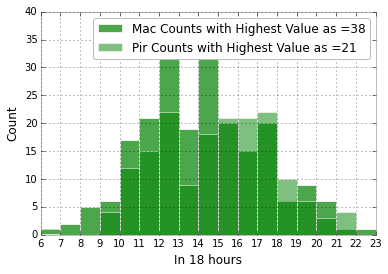

In [47]:
fig, ax = plt.subplots(1, 1)
ax.hist(hour_mac_final,l,color='g',alpha=0.7,label='Mac Counts with Highest Value as =%i'%max(k))
ax.set_xlabel('In 18 hours')
ax.set_ylabel('Count')
xticks(range(6,24)) 
#yticks(range(0,32,1))
ax.hist(k_pir1 ,l,color='g',alpha=0.5,label='Pir Counts with Highest Value as =%i'%max(k_pir1))
ax.set_ylim
pl.grid(True)
ax.legend()
pl.show()